# MNIST Digit Classification Problem using *SVC*



> Here we have used SVC (Support Vector Classifier) on the famous MNIST dataset to recognize handwritten numbers from 0 to 9. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets , svm , metrics , tree , naive_bayes
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

ds = datasets.load_digits()

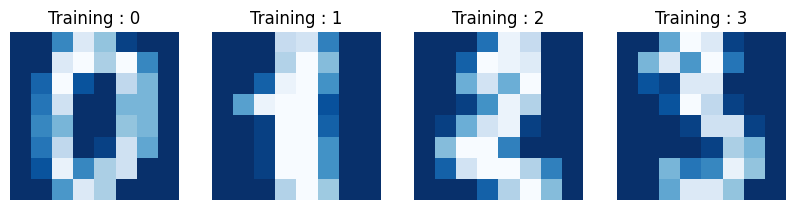

In [3]:
_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,4))
for axis,image,label in zip(axes,ds.images,ds.target):
  axis.set_axis_off()
  axis.imshow(image,cmap="Blues_r")
  axis.set_title("Training : {}".format(label))

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.86      0.95      0.90        38
           2       1.00      0.98      0.99        44
           3       1.00      1.00      1.00        32
           4       0.97      1.00      0.98        30
           5       0.97      1.00      0.99        35
           6       1.00      0.97      0.99        39
           7       1.00      1.00      1.00        35
           8       0.93      0.81      0.86        31
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360






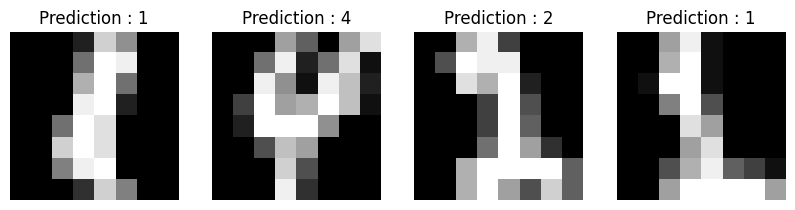

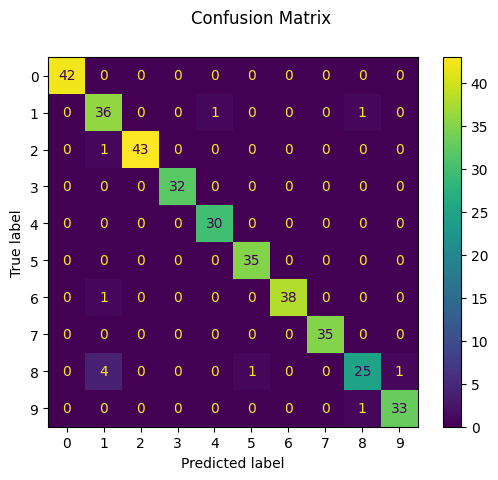

In [5]:
n_samples = len(ds.images)
data = ds.images.reshape(n_samples,-1)
model = svm.SVC(kernel="linear")
X_train,X_test,Y_train,Y_test = train_test_split(data,ds.target,test_size=0.2,shuffle=True)
model.fit(X_train,Y_train)

y_pred = model.predict(X_test)

_,axes = plt.subplots(nrows=1,ncols=4,figsize=(10,4))
for axis,image,label in zip(axes,X_test,y_pred):
  axis.set_axis_off()
  image = image.reshape(8,8)
  axis.imshow(image,cmap="gray")
  axis.set_title("Prediction : {}".format(label))

print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(Y_test, y_pred)}\n"
)

print("\n")
disp = metrics.ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")

plt.show()